# Ultimate Technologies: Predictive Modeling - EDA

In [1]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

## Load Data
Load the rider data.

In [2]:
df = pd.read_json('./data/ultimate_data_challenge.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


**Observations:**
* The columns `signup_date` and `last_trip_date` need to be converted to date-time data types.

In [5]:
date_columns = ['signup_date', 'last_trip_date']
for column in date_columns:
    df[column] = pd.to_datetime(df[column])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [8]:
df['city'].value_counts(normalize=True)

Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64

**Observations:**
* Almost a half come from Winterfell.
* Almost a third are from Astapor.
* About a quarter are from King's Landing.

In [9]:
df['phone'].value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

**Observations:**
* Most users use an iPhone.

## Active Drivers
Create a column to designate active drivers, those that have taken a trip within the past 30 days.

In [10]:
last_thirty_days = df['last_trip_date'].max() - datetime.timedelta(days=30)

In [11]:
df['active'] = df['last_trip_date'] > last_thirty_days

In [12]:
df['active'].value_counts(normalize=True)

False    0.6338
True     0.3662
Name: active, dtype: float64

**Observations:**
The percentage of retained users is 37%.

## Feature Engineering
### Date Columns
* Convert the _signup_date_ date column to day since last trip was taken.
* Drop the _last_trip_date_ column since that information is contained in the _active_ column, which will become the predictor variable.

In [13]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [14]:
df['days_since_signup_date'] = np.abs(df['signup_date'] - df['last_trip_date'].max())
df['days_since_signup_date'] = df['days_since_signup_date'].dt.days

Drop date columns.

In [15]:
df.drop(columns=['signup_date', 'last_trip_date'], inplace=True)

In [16]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_signup_date
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True,157
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False,153
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,176
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True,172
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False,155


### Boolean Columns
* Convert to 1s and 0s.

In [17]:
df['active'] = df['active'].astype(int)
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

### Categorical Columns
* One-hot encode categorical columns.

In [18]:
cat_columns = ['city', 'phone']
df = pd.get_dummies(df, prefix=cat_columns, columns=cat_columns, drop_first=True)

In [19]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_signup_date,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,157,1,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,153,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,176,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,172,1,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,155,0,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    41878 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int64  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    49799 non-null  float64
 8   active                  50000 non-null  int64  
 9   days_since_signup_date  50000 non-null  int64  
 10  city_King's Landing     50000 non-null  uint8  
 11  city_Winterfell         50000 non-null  uint8  
 12  phone_iPhone            50000 non-null  uint8  
dtypes: float64(6), int64(4), uint8(3)
memory usage: 4.0 MB


## Data Visualization
I will convert the _active_ column to string values for data visualization purposes.

In [21]:
df['active'] = df['active'].replace({1: 'yes', 0: 'no'})

Select columns to use for data visualization.

In [24]:
viz_columns = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
               'days_since_signup_date']

### Box Plots
I will create box plots for each of the numerical columns to gain and understanding of their distributions.

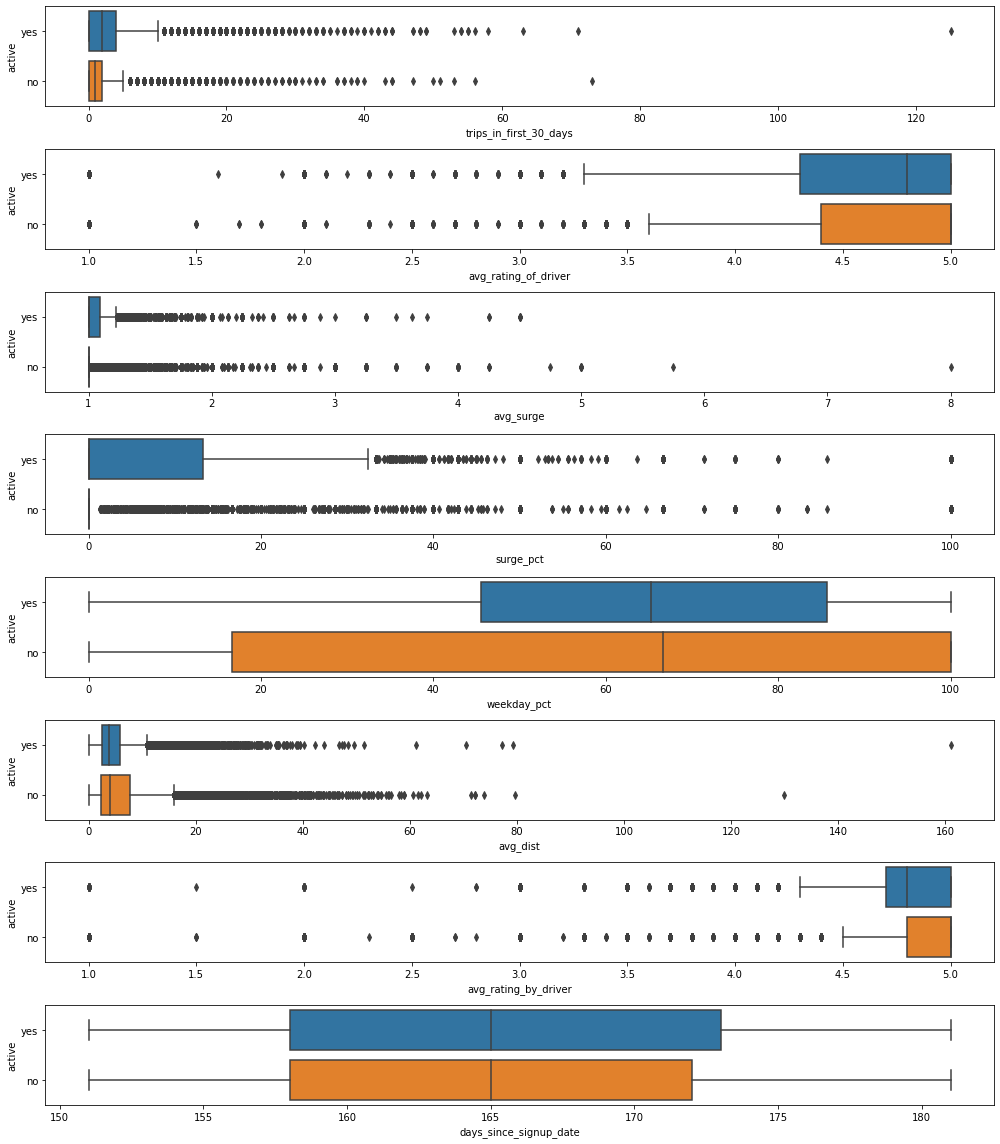

In [25]:
fig, ax = plt.subplots(len(viz_columns), 1, figsize=(14, 16))
for i, column in enumerate(viz_columns):
    ax[i] = sns.boxplot(x=column, y='active', data=df, ax=ax[i])
plt.tight_layout()
plt.show()

### Pair Plot

In [26]:
df.loc[:, viz_columns + ['active']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    41878 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    49799 non-null  float64
 7   days_since_signup_date  50000 non-null  int64  
 8   active                  50000 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 3.4+ MB


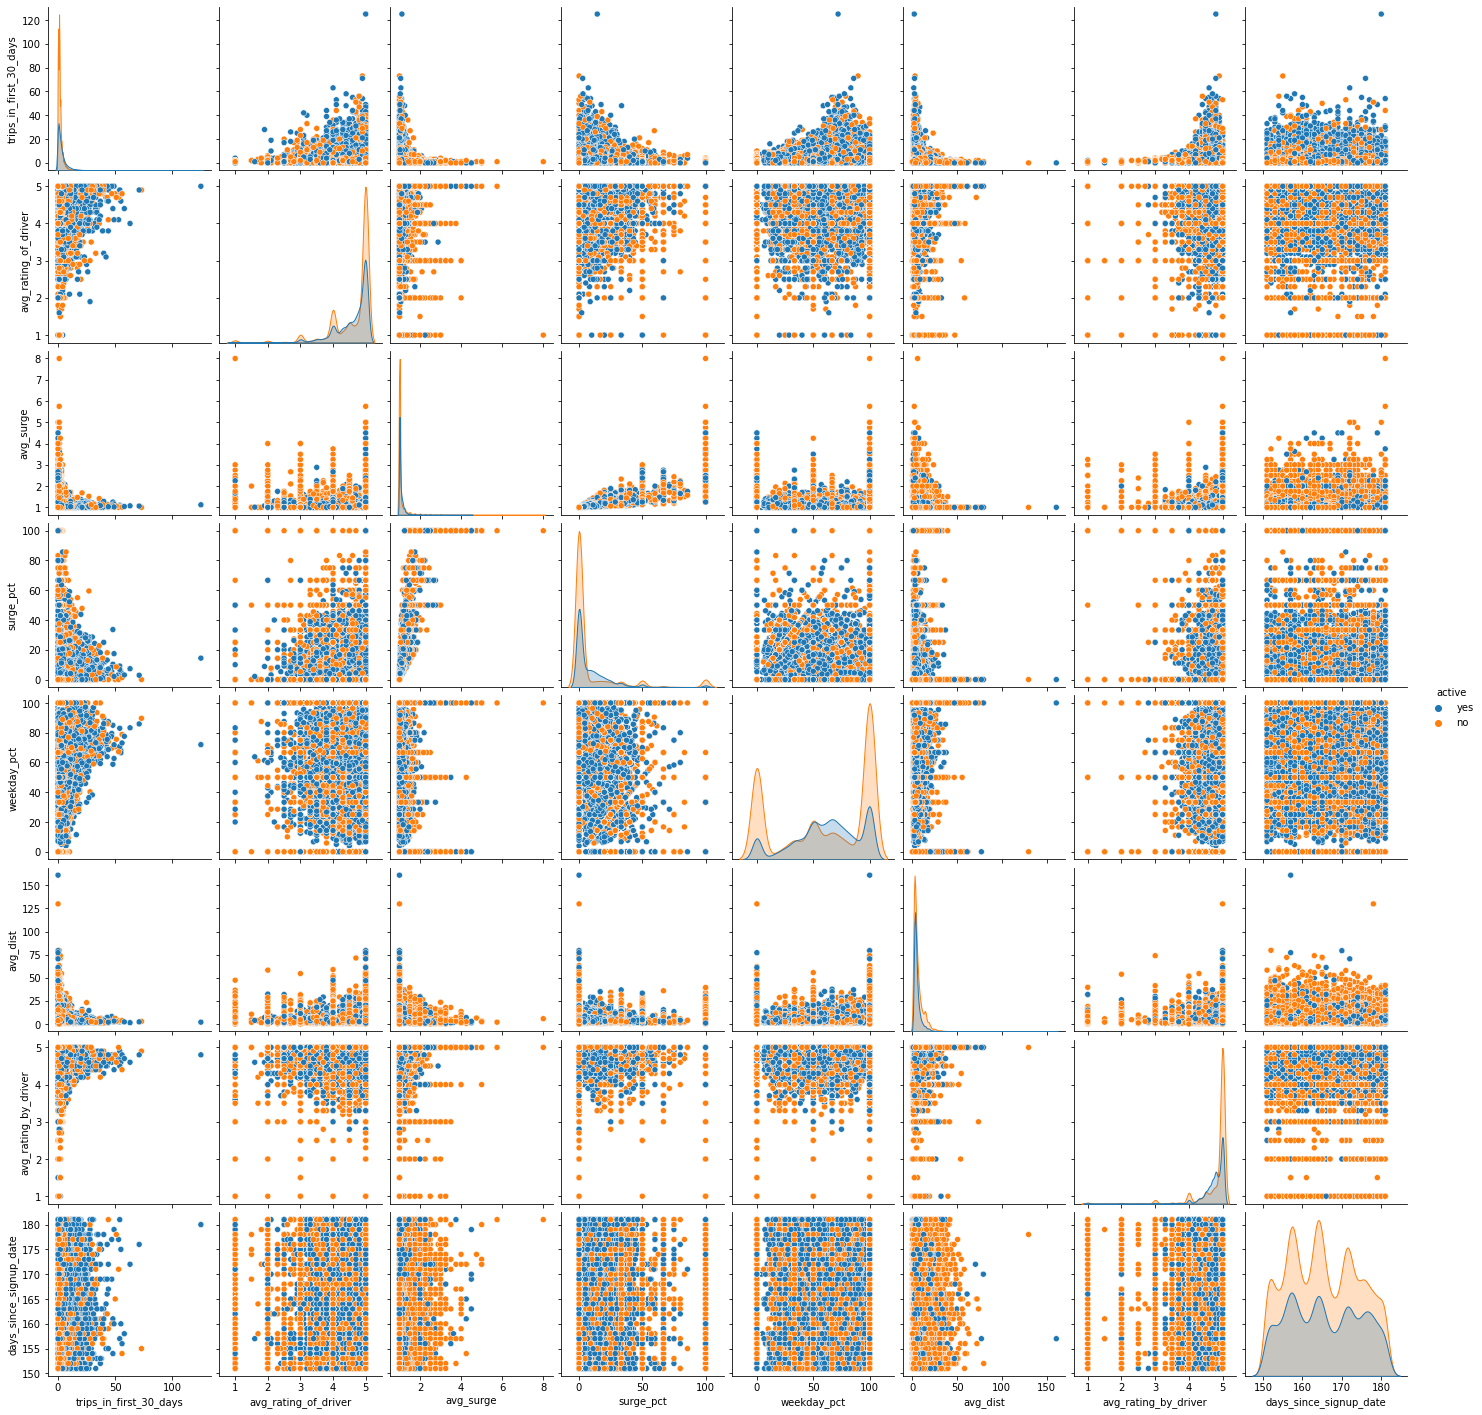

In [27]:
sns.pairplot(df.loc[:, viz_columns + ['active']], hue='active')
plt.show()

Convert values in _active_ column back to integers for modeling purposes.

In [28]:
df['active'] = df['active'].replace({'yes': 1, 'no': 0})

## Missing Values
The two columns _avg_rating_of_driver_ and _avg_rating_by_driver_ contain missing values. From the box plots above, you can see that these features are highly skewed. Therefore, I will fill in the missing values using the median value for each column.

In [29]:
missing_values = ['avg_rating_of_driver', 'avg_rating_by_driver']
for column in missing_values:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

## Save Data
Save the processed dataset to file.

In [30]:
df.to_csv('./data/processed_data.csv', index=False)